# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('max_columns', 150)

# Dataset Overview

In [77]:
def information(df):
    list_item = []
    column = df.columns
    for col in column:
        list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
        desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
    return desc_df

In [2]:
content = pd.read_csv('Content.csv', index_col=0)
location = pd.read_csv('Location.csv', index_col=0)
profile = pd.read_csv('Profile.csv', index_col=0)
reaction = pd.read_csv('Reactions.csv', index_col=0)
reaction_types = pd.read_csv('ReactionTypes.csv', index_col=0)
session = pd.read_csv('Session.csv', index_col=0)
user = pd.read_csv('User.csv', index_col=0)

## Content

In [22]:
information(content)

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,Content ID,object,0,0.0,1000,"[97522e57-d9ab-4bd6-97bf-c24d952602d2, 9f737e0..."
1,User ID,object,0,0.0,446,"[8d3cd87d-8a31-4935-9a4f-b319bfe05f31, beb1f34..."
2,Type,object,0,0.0,4,"[photo, video, GIF, audio]"
3,Category,object,0,0.0,41,"[Studying, healthy eating, technology, food]"
4,URL,object,199,19.9,801,[https://socialbuzz.cdn.com/content/storage/97...


In [26]:
content.shape

(1000, 5)

In [3]:
content['URL'] = content['URL'].fillna('missing')
content.isna().sum()

Content ID    0
User ID       0
Type          0
Category      0
URL           0
dtype: int64

## Location

In [27]:
information(location)

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,User ID,object,0,0.0,500,"[4c731e48-0377-4d7d-b4c8-b2174b774ed8, 95258c3..."
1,Address,object,0,0.0,500,"[6208 Wright Mountains\nBryantfurt, AR 02531, ..."


In [29]:
location.shape

(500, 2)

## Profile

In [30]:
information(profile)

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,User ID,object,0,0.0,500,"[4c731e48-0377-4d7d-b4c8-b2174b774ed8, 95258c3..."
1,Interests,object,0,0.0,366,"[[0, 1], ['tennis'], ['fitness', 'cooking', 'a..."
2,Age,int64,0,0.0,45,"[41, 23, 25, 2]"


In [31]:
profile.shape

(500, 3)

## Reaction

In [32]:
information(reaction)

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,Content ID,object,0,0.000000,980,"[97522e57-d9ab-4bd6-97bf-c24d952602d2, 9f737e0..."
1,User ID,object,3019,11.814660,500,"[nan, 5d454588-283d-459d-915d-c48a2cb4c27f, 92..."
2,Type,object,980,3.835166,16,"[nan, disgust, dislike, scared]"
3,Datetime,object,0,0.000000,25542,"[2021-04-22 15:17:15, 2020-11-07 09:43:50, 202..."


In [33]:
reaction.shape

(25553, 4)

In [4]:
reaction = reaction.dropna()

In [68]:
reaction.isnull().sum()

Content ID    0
User ID       0
Type          0
Datetime      0
dtype: int64

In [64]:
reaction.shape

(22534, 4)

## Reaction Types

In [35]:
information(reaction_types)

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,Type,object,0,0.0,16,"[heart, want, disgust, hate]"
1,Sentiment,object,0,0.0,3,"[positive, negative, neutral]"
2,Score,int64,0,0.0,15,"[60, 70, 0, 5]"


In [36]:
reaction_types.shape

(16, 3)

## Session

In [37]:
information(session)

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,User ID,object,0,0.0,500,"[4c731e48-0377-4d7d-b4c8-b2174b774ed8, 95258c3..."
1,Device,object,0,0.0,13,"[Microsoft, Apple, HTC, Motorola]"
2,Duration,int64,0,0.0,99,"[11, 51, 25, 68]"


In [38]:
session.shape

(500, 3)

## User

In [39]:
information(user)

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,User ID,object,0,0.0,500,"[4c731e48-0377-4d7d-b4c8-b2174b774ed8, 95258c3..."
1,Name,object,0,0.0,500,"[Gary Hill, Michael Deering, Richard Bain, Kri..."
2,Email,object,0,0.0,255,"[GHbnuothhymw, MD@gmail.com, RB@gmail.com, KM@..."


In [40]:
user.shape

(500, 3)

## Summmary

In [85]:
content.shape, reaction.shape, reaction_types.shape

((1000, 5), (22534, 4), (16, 3))

# Join

In [5]:
df = reaction.merge(reaction_types, how='left', on='Type')
df.head()

,Content ID,User ID,Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,positive,30


In [6]:
df = df.rename(columns={'Type':'Reaction Type'})
df.head()

,Content ID,User ID,Reaction Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,positive,30


In [7]:
data = df.merge(content.drop('User ID',axis=1), on=['Content ID'], how='left')
data.head()

,Content ID,User ID,Reaction Type,Datetime,Sentiment,Score,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,positive,30,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...


In [106]:
#data.to_csv('accenture_task1.csv')

In [9]:
df = pd.read_csv('accenture_task1.csv', index_col=0)
df.head()

,Content ID,User ID,Reaction Type,Datetime,Sentiment,Score,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,positive,30,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...


## Feature Engineering

In [19]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Hours'] = df['Datetime'].dt.hour
df['Month'] = df['Datetime'].dt.month_name()
df['Year'] = df['Datetime'].dt.year
df['Date'] = df['Datetime'].dt.day
df['Day'] = df['Datetime'].dt.day_name()

In [21]:
df['Weekend'] = np.where(df['Day']=='Saturday',1,
                np.where(df['Day']=='Sunday',1,0))

In [39]:
df['Time_Range'] = np.where((df['Hours']>=0)&(df['Hours']<4),'Midnight',
                   np.where((df['Hours']>4)&(df['Hours']<9),'Morning',
                   np.where((df['Hours']>9)&(df['Hours']<16),'Afternoon',
                   np.where((df['Hours']>17)&(df['Hours']<20),'Evening','Night'))))

In [40]:
df['AM/PM'] = np.where((df['Hours']>=0)&(df['Hours']<=12),'AM','PM')

In [41]:
df.head()

,Content ID,User ID,Reaction Type,Datetime,Sentiment,Score,Type,Category,URL,Hours,Month,Year,Date,Day,Weekend,Time_Range,AM/PM
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,9,November,2020,7,Saturday,1,Night,AM
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,12,June,2021,17,Thursday,0,Afternoon,AM
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,5,April,2021,18,Sunday,1,Morning,AM
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,19,January,2021,6,Wednesday,0,Evening,PM
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,positive,30,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,12,August,2020,23,Sunday,1,Afternoon,AM


In [78]:
information(df)

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,Content ID,object,0,0.0,962,"[97522e57-d9ab-4bd6-97bf-c24d952602d2, 9f737e0..."
1,User ID,object,0,0.0,500,"[5d454588-283d-459d-915d-c48a2cb4c27f, 92b87fa..."
2,Reaction Type,object,0,0.0,16,"[disgust, dislike, scared, interested]"
3,Datetime,datetime64[ns],0,0.0,22524,"[2020-11-07T09:43:50.000000000, 2021-06-17T12:..."
4,Sentiment,object,0,0.0,3,"[negative, positive, neutral]"
5,Score,int64,0,0.0,15,"[0, 10, 15, 30]"
6,Type,object,0,0.0,4,"[photo, video, GIF, audio]"
7,Category,object,0,0.0,40,"[Studying, healthy eating, technology, food]"
8,URL,object,0,0.0,773,[https://socialbuzz.cdn.com/content/storage/97...
9,Hours,int64,0,0.0,24,"[9, 12, 5, 19]"


# Data Exploratory

In [235]:
pal = ['#ea698b','#d55d92','#c05299','#ac46a1','#ac46a1','#822faf','#6d23b6','#6411ad','#571089','#47126b']

## `Reaction Type by its Sentiment Score`

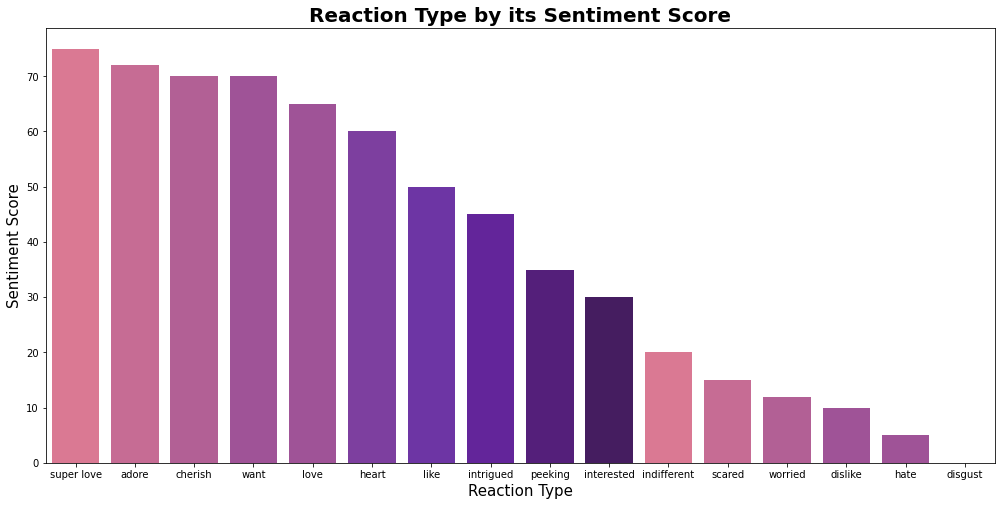

In [255]:
react_type_score = df.groupby('Reaction Type')['Score'].mean().reset_index()
plt.figure(figsize=(17,8))
sns.barplot(x='Reaction Type', y='Score', data=react_type_score, 
            palette=pal, order=react_type_score.sort_values(by='Score', ascending=False)['Reaction Type'])

plt.title('Reaction Type by its Sentiment Score', fontsize=20, weight='extra bold')
plt.xlabel('Reaction Type', fontsize=15)
plt.ylabel('Sentiment Score', fontsize=15)

#plt.savefig('figure1.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

## `Reaction Type by Mean Hours`

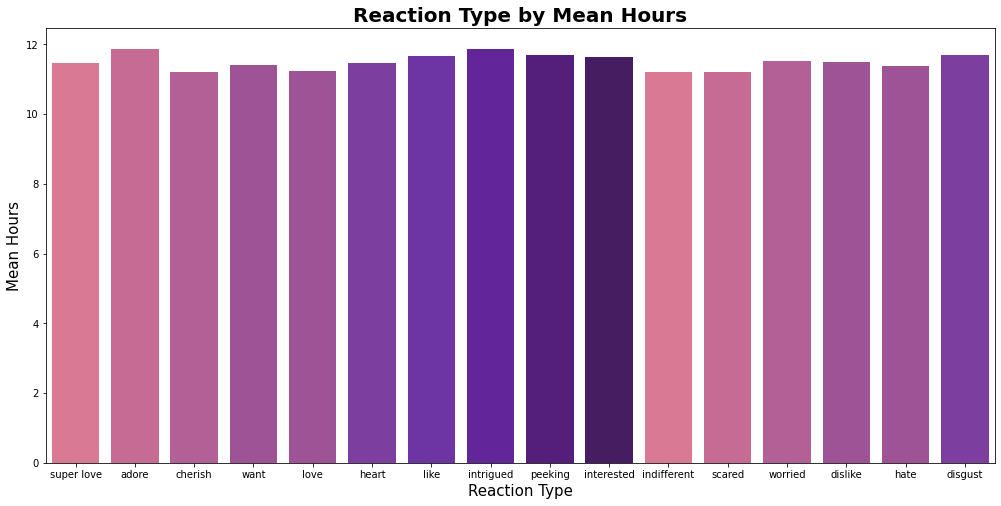

In [256]:
plt.figure(figsize=(17,8))
sns.barplot(x='Reaction Type', y='Hours', data=df, palette=pal, ci=None,
           order=react_type_score.sort_values(by='Score', ascending=False)['Reaction Type'])

plt.title('Reaction Type by Mean Hours', fontsize=20, weight='extra bold')
plt.xlabel('Reaction Type', fontsize=15)
plt.ylabel('Mean Hours', fontsize=15)

#plt.savefig('figure2.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

## `Sentiment by Time Range`

In [123]:
abc = df.groupby(['Sentiment','Time_Range'])['Hours'].count()/df.groupby('Sentiment')['Year'].count()
abc = abc.reset_index()
abc = abc.rename(columns={0:'Ratio'})
abc

,Sentiment,Time_Range,Ratio
0,negative,Afternoon,0.239733
1,negative,Evening,0.082137
2,negative,Midnight,0.165838
3,negative,Morning,0.175643
4,negative,Night,0.336649
5,neutral,Afternoon,0.241233
6,neutral,Evening,0.076514
7,neutral,Midnight,0.168261
8,neutral,Morning,0.168261
9,neutral,Night,0.345731


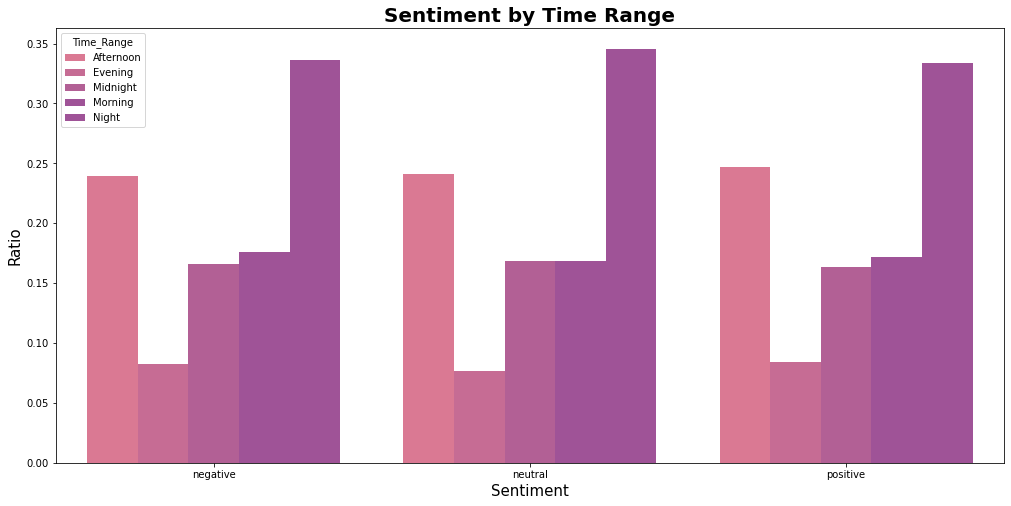

In [257]:
plt.figure(figsize=(17,8))
sns.barplot(x='Sentiment', y='Ratio', palette=pal, data=abc, hue='Time_Range')

plt.title('Sentiment by Time Range', fontsize=20, weight='extra bold')
plt.xlabel('Sentiment', fontsize=15)
plt.ylabel('Ratio', fontsize=15)

#plt.savefig('figure3.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

# Data Join 2

In [168]:
merge1 = df.merge(profile, on='User ID', how='left')
merge1.head()

,Content ID,User ID,Reaction Type,Datetime,Sentiment,Score,Type,Category,URL,Hours,Month,Year,Date,Day,Weekend,Time_Range,AM/PM,Interests,Age
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,9,November,2020,7,Saturday,1,Night,AM,['travel'],6
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,12,June,2021,17,Thursday,0,Afternoon,AM,['cooking'],30
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,5,April,2021,18,Sunday,1,Morning,AM,"['studying', 'tennis', 'veganism', 'technology']",5
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,19,January,2021,6,Wednesday,0,Evening,PM,"['studying', 'public speaking']",17
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,positive,30,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,12,August,2020,23,Sunday,1,Afternoon,AM,"['animals', 'animals', 'dogs']",23


In [177]:
data = merge1.merge(session, how='left', on='User ID')
data.head()

,Content ID,User ID,Reaction Type,Datetime,Sentiment,Score,Type,Category,URL,Hours,Month,Year,Date,Day,Weekend,Time_Range,AM/PM,Interests,Age,Device,Duration
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,9,November,2020,7,Saturday,1,Night,AM,['travel'],6,Motorola,88
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,12,June,2021,17,Thursday,0,Afternoon,AM,['cooking'],30,Huawei,11
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,5,April,2021,18,Sunday,1,Morning,AM,"['studying', 'tennis', 'veganism', 'technology']",5,Motorola,26
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,19,January,2021,6,Wednesday,0,Evening,PM,"['studying', 'public speaking']",17,Microsoft,96
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,positive,30,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...,12,August,2020,23,Sunday,1,Afternoon,AM,"['animals', 'animals', 'dogs']",23,HTC,19


# Exploratory Data Analysis

## `Device by Duration`

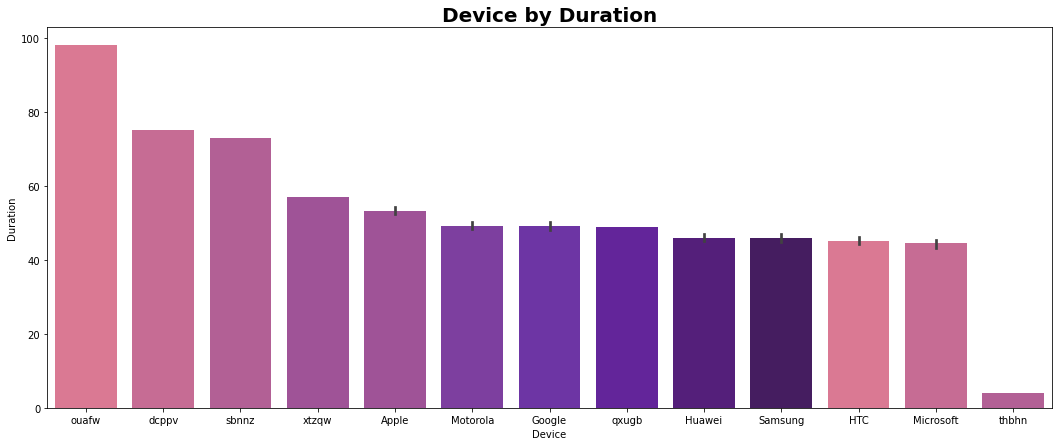

In [258]:
plt.figure(figsize=(18,7))
sns.barplot(x='Device',y='Duration',data=data, order=data.groupby('Device')['Duration'].mean().reset_index().sort_values(by='Duration',ascending=False)['Device'].values,
            palette=pal)

plt.title('Device by Duration', fontsize=20, weight='extra bold')

#plt.savefig('figure4.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

## `Category by AM/PM`

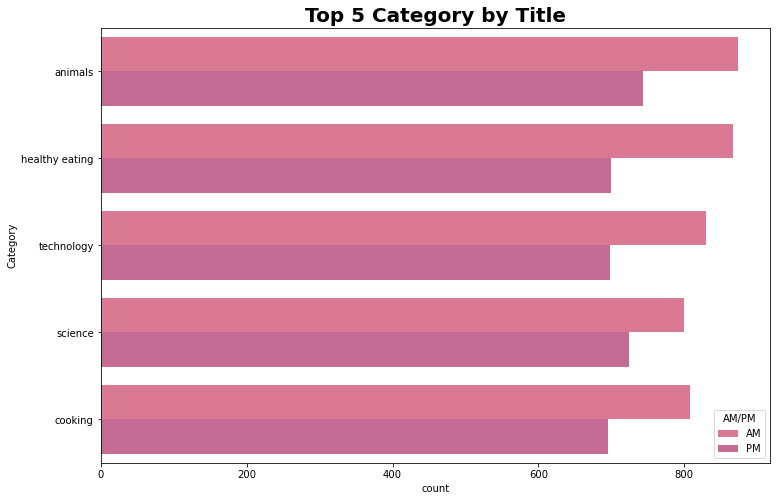

In [259]:
order_list = ['animals', 'healthy eating', 'technology', 'science', 'cooking',]

plt.figure(figsize=(12,8))
sns.countplot(y='Category', hue='AM/PM', data=df, palette=pal,
              order=order_list)

plt.title('Top 5 Category by Title', fontsize=20, weight='extra bold')

#plt.savefig('figure5.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

## `Category by Positive Sentiment`

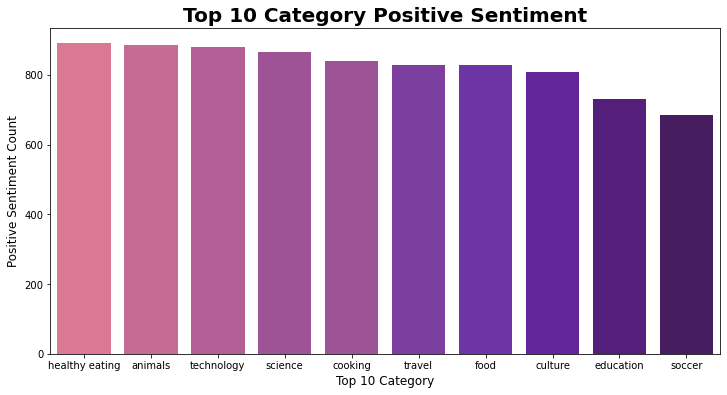

In [260]:
pos = df[df['Sentiment']=='positive']
pos = pos.groupby('Category')['Hours'].count().reset_index().sort_values(by='Hours',ascending=False).reset_index(drop=True).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Category', y='Hours', data=pos, palette=pal)
plt.ylabel('Positive Sentiment Count', fontsize=12)
plt.xlabel('Top 10 Category', fontsize=12)
plt.title('Top 10 Category Positive Sentiment', fontsize=20, weight='extra bold')

#plt.savefig('figure6.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

## `Category by Negative Sentiment`

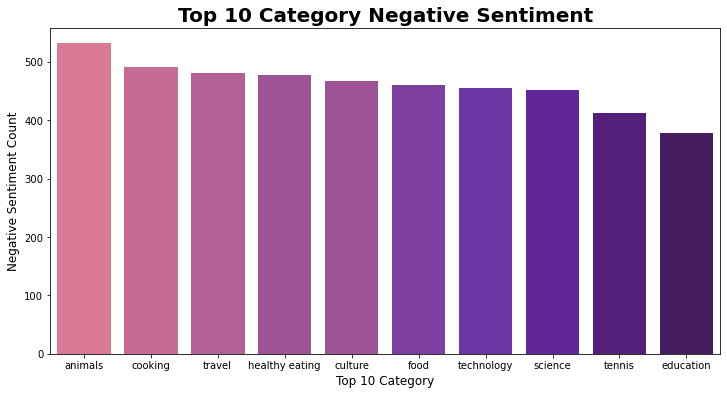

In [261]:
neg = df[df['Sentiment']=='negative']
neg = neg.groupby('Category')['Hours'].count().reset_index().sort_values(by='Hours',ascending=False).reset_index(drop=True).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Category', y='Hours', data=neg, palette=pal)
plt.ylabel('Negative Sentiment Count', fontsize=12)
plt.xlabel('Top 10 Category', fontsize=12)
plt.title('Top 10 Category Negative Sentiment', fontsize=20, weight='extra bold')

#plt.savefig('figure7.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


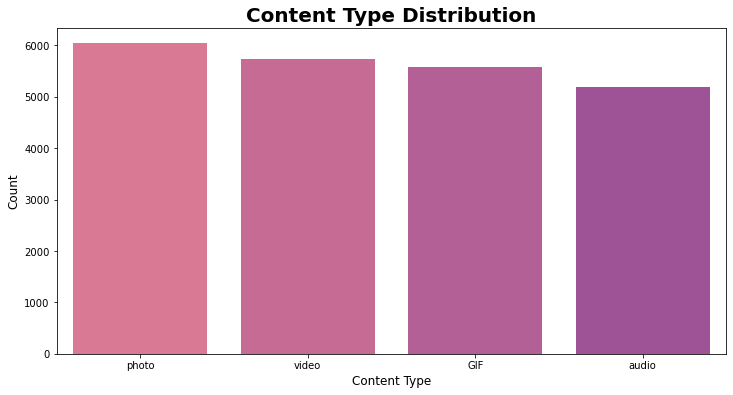

In [262]:
plt.figure(figsize=(12,6))
sns.countplot(data['Type'], palette=pal)
plt.title('Content Type Distribution', fontsize=20, weight='extra bold')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Content Type', fontsize=12)

#plt.savefig('figure8.png', dpi=500, bbox_inches='tight', pad_inches=0.2, transparent=True)